In [11]:
import pandas as pd

In [8]:
df = pd.read_csv('retail_sales_dataset.csv')

##### Handle missing values

In [13]:
print(df.isnull().sum())
print(df.dropna(inplace = True))

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
None


##### Remove duplicate or canceled orders

In [16]:
print(df.duplicated().sum())
print(df.drop_duplicates(inplace = True))

0
None


##### Create columns like TotalPrice = Quantity * UnitPrice

In [21]:
df['TotalPrice'] = df['Quantity'] * df['Price per Unit']
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,TotalPrice
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,100


##### Export cleaned data to a CSV.

In [30]:
df.to_csv('retail_sales_dataset_cln.csv', index=False)
print("Cleaned data exported to cleaned_retail_sales_dataset.csv")

Cleaned data exported to cleaned_retail_sales_dataset.csv


In [6]:
!pip install PyMySQL
!pip install ipython-sql
!pip install mysqlclient
!pip install mysql
!pip install mysql.connector

In [3]:
import pymysql

mydb = pymysql.connect(
    host="localhost",
    user="root",
    password="Shailesh@06",
    database="Retail_Sale"
)

In [5]:
cursor = mydb.cursor()

In [15]:
df = pd.read_csv('retail_sales_dataset_cln.csv')
for _, row in df.iterrows():
    cursor.execute("""INSERT INTO sales(Transaction_ID, Date_, Customer_ID, Gender, Age, Product_Category, Quantity, Price_per_Unit, Total_Amount, TotalPrice)
    Values(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, (row["Transaction ID"], row["Date"], row["Customer ID"], row["Gender"], row["Age"], row["Product Category"], row["Quantity"], row["Price per Unit"], row["Total Amount"], row["TotalPrice"]))

mydb.commit()
print("Data Inserted Successfully")

Data Inserted Successfully


In [19]:
querry = "SELECT * FROM Sales"
cursor.execute(querry)
rows = cursor.fetchall()
for row in rows:
    print(row)

(1, datetime.date(2023, 11, 24), 'CUST001', 'Male', 34, 'Beauty', 3, 50, 150, 150)
(2, datetime.date(2023, 2, 27), 'CUST002', 'Female', 26, 'Clothing', 2, 500, 1000, 1000)
(3, datetime.date(2023, 1, 13), 'CUST003', 'Male', 50, 'Electronics', 1, 30, 30, 30)
(4, datetime.date(2023, 5, 21), 'CUST004', 'Male', 37, 'Clothing', 1, 500, 500, 500)
(5, datetime.date(2023, 5, 6), 'CUST005', 'Male', 30, 'Beauty', 2, 50, 100, 100)
(6, datetime.date(2023, 4, 25), 'CUST006', 'Female', 45, 'Beauty', 1, 30, 30, 30)
(7, datetime.date(2023, 3, 13), 'CUST007', 'Male', 46, 'Clothing', 2, 25, 50, 50)
(8, datetime.date(2023, 2, 22), 'CUST008', 'Male', 30, 'Electronics', 4, 25, 100, 100)
(9, datetime.date(2023, 12, 13), 'CUST009', 'Male', 63, 'Electronics', 2, 300, 600, 600)
(10, datetime.date(2023, 10, 7), 'CUST010', 'Female', 52, 'Clothing', 4, 50, 200, 200)
(11, datetime.date(2023, 2, 14), 'CUST011', 'Male', 23, 'Clothing', 2, 50, 100, 100)
(12, datetime.date(2023, 10, 30), 'CUST012', 'Male', 35, 'Beauty'

##### Time series line plot: Monthly sales trend


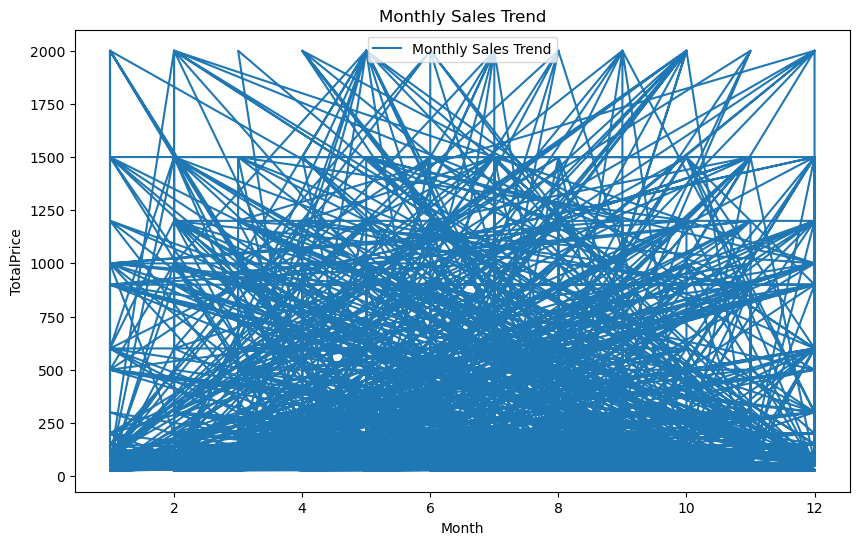

In [33]:
import matplotlib.pyplot as plt
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['TotalPrice'], label='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('TotalPrice')
plt.title('Monthly Sales Trend')
plt.legend()
plt.show()

##### Bar chart: Top product category by revenue


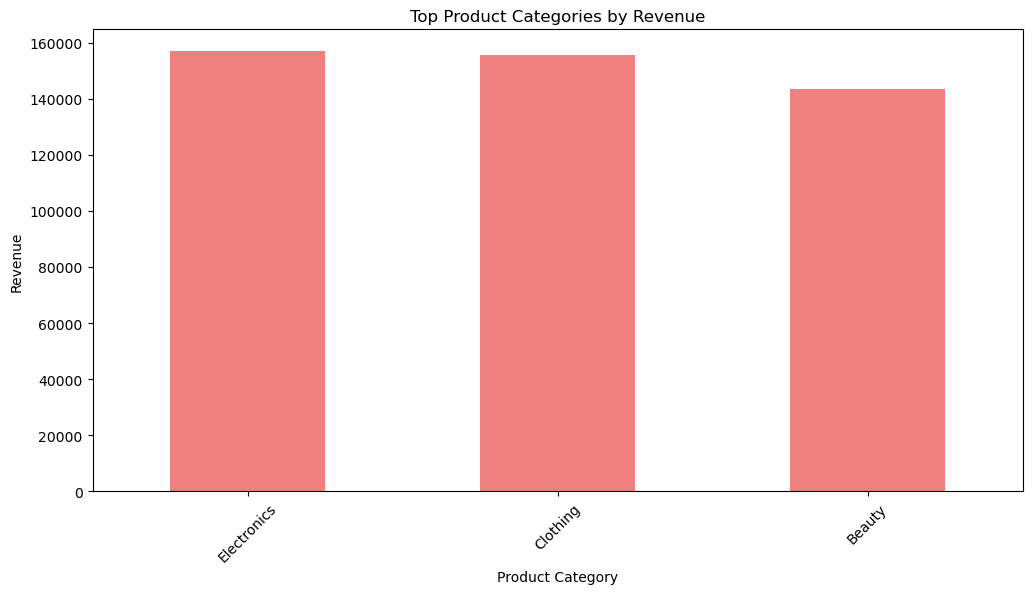

In [38]:
category_revenue = df.groupby('Product Category')['TotalPrice'].sum().sort_values(ascending=False)

top_categories = category_revenue.head()

plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='lightcoral')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Top Product Categories by Revenue')
plt.xticks(rotation=45)
plt.show()

##### Pie chart: Contribution of top 5 customers

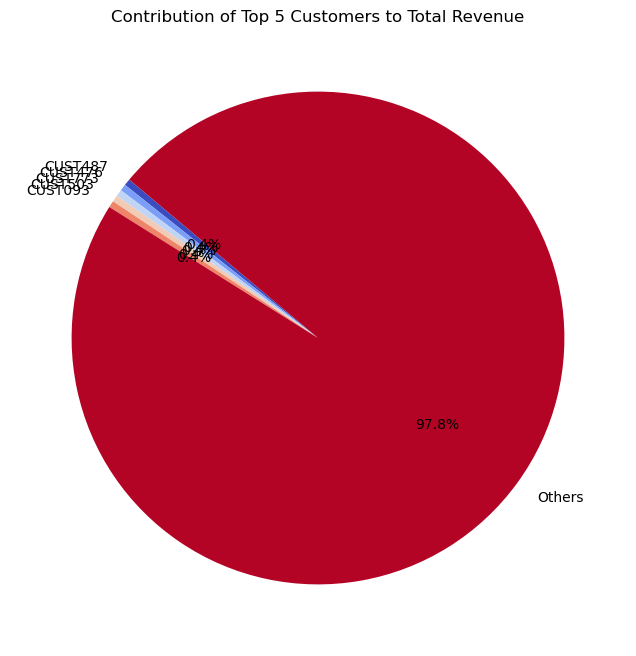

In [40]:
customer_revenue = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False)

top_5_customers = customer_revenue.head(5)

others_revenue = customer_revenue[5:].sum()
top_5_customers['Others'] = others_revenue

plt.figure(figsize=(8, 8))
top_5_customers.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='coolwarm')
plt.ylabel('') 
plt.title('Contribution of Top 5 Customers to Total Revenue')
plt.show()

##### Heatmap: Sales by month and product category

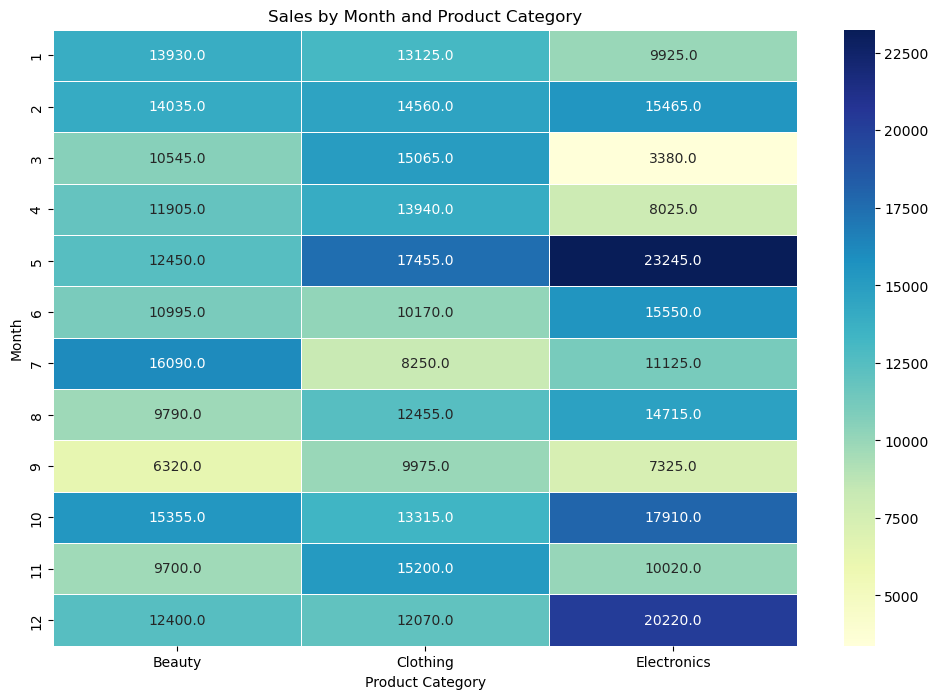

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='Month', columns='Product Category', values='TotalPrice', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=0.5)
plt.title('Sales by Month and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Month')
plt.show()